# Polynomial Regression

In [1]:
import pandas as pb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

from sklearn.model_selection import train_test_split

In [2]:
# converting into dataframe
df = pb.read_csv(r"E:\coding\CSV\HeightVsWeight.csv")

In [3]:
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [4]:
# features value 
x = df.iloc[:,0].values
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80], dtype=int64)

In [5]:
# target value 
y = df.iloc[:,1].values
y

array([138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 141, 141, 142,
       142, 142, 143, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147,
       148, 148, 149, 149, 150, 150, 151, 152, 153, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 178, 180, 183, 185, 188, 190, 193, 195, 199,
       203, 204, 205, 206, 207, 208], dtype=int64)

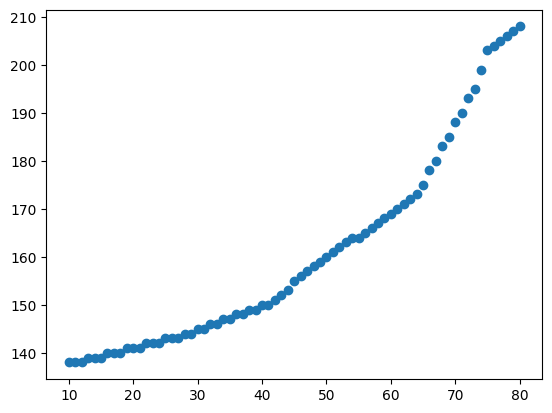

In [6]:
# ploting the scatter plot
# non-linear graph is formed
# polynomial eq will be used
plt.scatter(x,y)

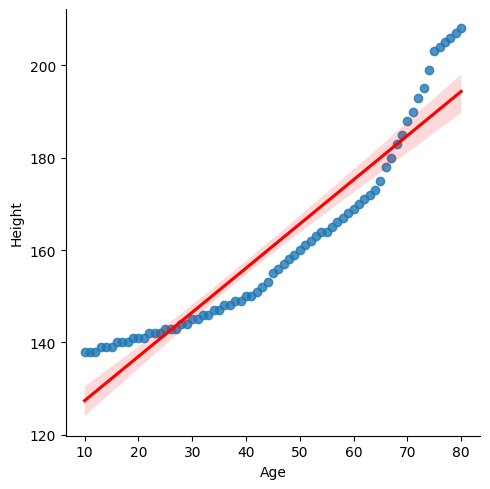

In [7]:
# liner regression will not be suitable for this graph
sns.lmplot(x="Age", y="Height",data=df,line_kws={'color': 'red'})

In [8]:
# spliting dataframe in training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [9]:
# creating LinearRegression model 
reg = linear_model.LinearRegression()

In [10]:
# creating polynomial feature variable
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

In [11]:
# transforming feature set(i.e x) into polynomial features set
x_poly_train = poly.fit_transform(x_train.reshape(-1,1))
x_poly_test = poly.fit_transform(x_test.reshape(-1,1))

In [12]:
# fiting polynomial training feature set and training target set into linear regression model  
reg.fit(x_poly_train, y_train)

LinearRegression()

# polynomial model score = 0.9930990938355491

In [13]:
# score for polynomial feature test set with target test set
reg.score(x_poly_test, y_test)

0.9932159653752306

In [14]:
y_predict = reg.predict(x_poly_test)
y_predict


array([188.93455787, 138.73504971, 149.37230845, 196.11796595,
       154.21749594, 186.74847121, 213.72267588, 163.40663516,
       180.75439703, 154.99711079, 146.43891495, 191.2218394 ,
       138.69114405, 162.32377717, 140.61753544])

In [15]:
y_test

array([190, 138, 149, 199, 155, 188, 208, 164, 180, 156, 146, 193, 138,
       164, 141], dtype=int64)

In [16]:
x_val = np.linspace(10, 80, 50).reshape(-1,1)
x_val_poly = poly.transform(x_val)

y_val = reg.predict(x_val_poly)


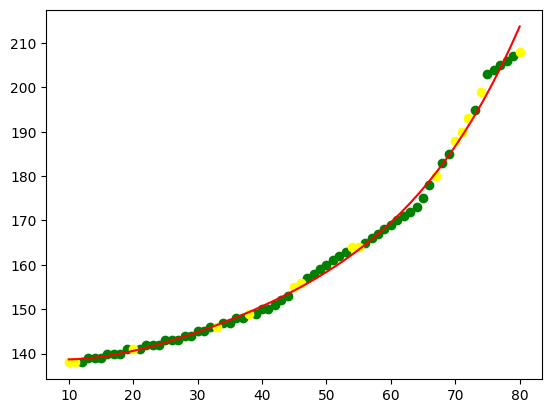

In [17]:
plt.scatter(x_train, y_train, color="green")
plt.scatter(x_test, y_test, color="yellow")
plt.plot(x_val,y_val, color= "r")
plt.show()

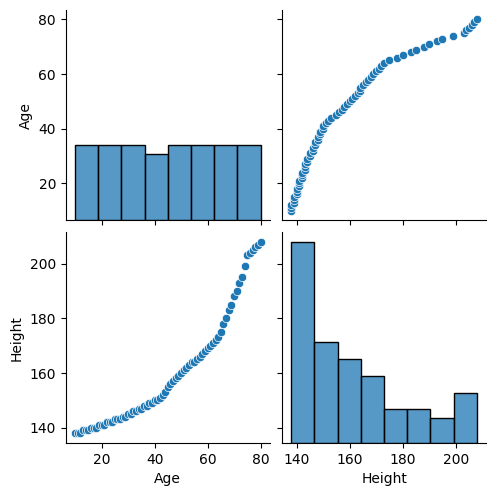

In [18]:
import seaborn as sns

# Visualize the whole dataset
sns.pairplot(df)